<a href="https://colab.research.google.com/github/siddharth3444/detect_window/blob/main/Loading_Image_Data_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf ./dataset

In [ ]:
!unzip dataset_final.zip -d ./dataset

Archive:  dataset_final.zip
   creating: ./dataset/annotations/
   creating: ./dataset/images/
  inflating: ./dataset/sceneCategories.txt  
   creating: ./dataset/annotations/testing/
   creating: ./dataset/annotations/training/
  inflating: ./dataset/annotations/testing/14.png  
  inflating: ./dataset/annotations/testing/9.png  
  inflating: ./dataset/annotations/testing/1.png  
  inflating: ./dataset/annotations/training/12.png  
  inflating: ./dataset/annotations/training/11.png  
  inflating: ./dataset/annotations/training/6.png  
  inflating: ./dataset/annotations/training/15.png  
  inflating: ./dataset/annotations/training/4.png  
  inflating: ./dataset/annotations/training/10.png  
  inflating: ./dataset/annotations/training/20.png  
  inflating: ./dataset/annotations/training/19.png  
  inflating: ./dataset/annotations/training/3.png  
  inflating: ./dataset/annotations/training/13.png  
  inflating: ./dataset/annotations/training/7.png  
  inflating: ./dataset/annotations/tra

In [ ]:
!wget https://raw.githubusercontent.com/CSAILVision/placeschallenge/master/instancesegmentation/instanceInfo100_train.txt

--2024-02-16 18:01:04--  https://raw.githubusercontent.com/CSAILVision/placeschallenge/master/instancesegmentation/instanceInfo100_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3313 (3.2K) [text/plain]
Saving to: ‘instanceInfo100_train.txt’

instanceInfo100_tra 100%[===================>]   3.24K  --.-KB/s    in 0s      

2024-02-16 18:01:04 (38.8 MB/s) - ‘instanceInfo100_train.txt’ saved [3313/3313]



In [ ]:
import pandas as pd

data = pd.read_csv('/content/instanceInfo100_train.txt',
                   sep='\t', header=0, error_bad_lines=False)
data.head(100)

<ipython-input-4-7abfa601991d>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/instanceInfo100_train.txt',


,Idx,Object Names,Unnamed: 2,#Inst.,#Pix. per Inst.(*1e3)
0,1,bed,2189,49.06,NaN
1,2,windowpane,8833,10.57,NaN
2,3,cabinet,6727,12.59,NaN
3,4,person,21441,3.47,NaN
4,5,door,4694,11.82,NaN
...,...,...,...,...,...
95,96,bulletin board,282,5.02,NaN
96,97,radiator,199,5.93,NaN
97,98,glass,1487,0.67,NaN
98,99,clock,843,1.25,NaN


In [ ]:
id2label = {id: label.strip() for id, label in enumerate(data["Object Names"])}
print(id2label)

{0: 'bed', 1: 'windowpane', 2: 'cabinet', 3: 'person', 4: 'door', 5: 'table', 6: 'curtain', 7: 'chair', 8: 'car', 9: 'painting', 10: 'sofa', 11: 'shelf', 12: 'mirror', 13: 'armchair', 14: 'seat', 15: 'fence', 16: 'desk', 17: 'wardrobe', 18: 'lamp', 19: 'bathtub', 20: 'railing', 21: 'cushion', 22: 'box', 23: 'column', 24: 'signboard', 25: 'chest of drawers', 26: 'counter', 27: 'sink', 28: 'fireplace', 29: 'refrigerator', 30: 'stairs', 31: 'case', 32: 'pool table', 33: 'pillow', 34: 'screen door', 35: 'bookcase', 36: 'coffee table', 37: 'toilet', 38: 'flower', 39: 'book', 40: 'bench', 41: 'countertop', 42: 'stove', 43: 'palm', 44: 'kitchen island', 45: 'computer', 46: 'swivel chair', 47: 'boat', 48: 'arcade machine', 49: 'bus', 50: 'towel', 51: 'light', 52: 'truck', 53: 'chandelier', 54: 'awning', 55: 'streetlight', 56: 'booth', 57: 'television receiver', 58: 'airplane', 59: 'apparel', 60: 'pole', 61: 'bannister', 62: 'ottoman', 63: 'bottle', 64: 'van', 65: 'ship', 66: 'fountain', 67: 'w

In [ ]:
#id2label = {  id: label.strip() for id, label in enumerate(data["Object Names"])}
id2label={
    "0": "wall",
    "1": "building",
    "2": "sky",
    "3": "floor",
    "4": "tree",
    "5": "ceiling",
    "6": "road, route",
    "7": "bed",
    "8": "window ",
    "9": "grass",
    "10": "cabinet",
    "11": "sidewalk, pavement",
    "12": "person",
    "13": "earth, ground",
    "14": "door",
    "15": "table",
    "16": "mountain, mount",
    "17": "plant",
    "18": "curtain",
    "19": "chair",
    "20": "car",
    "21": "water",
    "22": "painting, picture",
    "23": "sofa",
    "24": "shelf",
    "25": "house",
    "26": "sea",
    "27": "mirror",
    "28": "rug",
    "29": "field",
    "30": "armchair",
    "31": "seat",
    "32": "fence",
    "33": "desk",
    "34": "rock, stone",
    "35": "wardrobe, closet, press",
    "36": "lamp",
    "37": "tub",
    "38": "rail",
    "39": "cushion",
    "40": "base, pedestal, stand",
    "41": "box",
    "42": "column, pillar",
    "43": "signboard, sign",
    "44": "chest of drawers, chest, bureau, dresser",
    "45": "counter",
    "46": "sand",
    "47": "sink",
    "48": "skyscraper",
    "49": "fireplace",
    "50": "refrigerator, icebox",
    "51": "grandstand, covered stand",
    "52": "path",
    "53": "stairs",
    "54": "runway",
    "55": "case, display case, showcase, vitrine",
    "56": "pool table, billiard table, snooker table",
    "57": "pillow",
    "58": "screen door, screen",
    "59": "stairway, staircase",
    "60": "river",
    "61": "bridge, span",
    "62": "bookcase",
    "63": "blind, screen",
    "64": "coffee table",
    "65": "toilet, can, commode, crapper, pot, potty, stool, throne",
    "66": "flower",
    "67": "book",
    "68": "hill",
    "69": "bench",
    "70": "countertop",
    "71": "stove",
    "72": "palm, palm tree",
    "73": "kitchen island",
    "74": "computer",
    "75": "swivel chair",
    "76": "boat",
    "77": "bar",
    "78": "arcade machine",
    "79": "hovel, hut, hutch, shack, shanty",
    "80": "bus",
    "81": "towel",
    "82": "light",
    "83": "truck",
    "84": "tower",
    "85": "chandelier",
    "86": "awning, sunshade, sunblind",
    "87": "street lamp",
    "88": "booth",
    "89": "tv",
    "90": "plane",
    "91": "dirt track",
    "92": "clothes",
    "93": "pole",
    "94": "land, ground, soil",
    "95": "bannister, banister, balustrade, balusters, handrail",
    "96": "escalator, moving staircase, moving stairway",
    "97": "ottoman, pouf, pouffe, puff, hassock",
    "98": "bottle",
    "99": "buffet, counter, sideboard",
    "100": "poster, posting, placard, notice, bill, card",
    "101": "stage",
    "102": "van",
    "103": "ship",
    "104": "fountain",
    "105": "conveyer belt, conveyor belt, conveyer, conveyor, transporter",
    "106": "canopy",
    "107": "washer, automatic washer, washing machine",
    "108": "plaything, toy",
    "109": "pool",
    "110": "stool",
    "111": "barrel, cask",
    "112": "basket, handbasket",
    "113": "falls",
    "114": "tent",
    "115": "bag",
    "116": "minibike, motorbike",
    "117": "cradle",
    "118": "oven",
    "119": "ball",
    "120": "food, solid food",
    "121": "step, stair",
    "122": "tank, storage tank",
    "123": "trade name",
    "124": "microwave",
    "125": "pot",
    "126": "animal",
    "127": "bicycle",
    "128": "lake",
    "129": "dishwasher",
    "130": "screen",
    "131": "blanket, cover",
    "132": "sculpture",
    "133": "hood, exhaust hood",
    "134": "sconce",
    "135": "vase",
    "136": "traffic light",
    "137": "tray",
    "138": "trash can",
    "139": "fan",
    "140": "pier",
    "141": "crt screen",
    "142": "plate",
    "143": "monitor",
    "144": "bulletin board",
    "145": "shower",
    "146": "radiator",
    "147": "glass, drinking glass",
    "148": "clock",
    "149": "flag"
}

id2label={ int(key):value for key,value in id2label.items() }
id2label={0:'window',1:'curtain'}

In [ ]:
import os
import cv2
from PIL import Image

image_data_dir='/content/dataset/images/training'
annotation_data_dir='/content/dataset/annotations/training'

dataset=[]
for item in os.listdir(image_data_dir):
  obj={}
  name=item.split(".")[0]
  obj['image']=Image.open(f"{image_data_dir}/{name}.jpg")
  obj['annotation']=Image.open(f"{annotation_data_dir}/{name}.png")
  dataset.append(obj)

dataset

[{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1038x682>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1038x682>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=573x300>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=573x300>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x1080>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1000x1080>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1077x1440>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1077x1440>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x673>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x673>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x600>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1000x600>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile imag

In [ ]:
index=8
len(dataset)

19

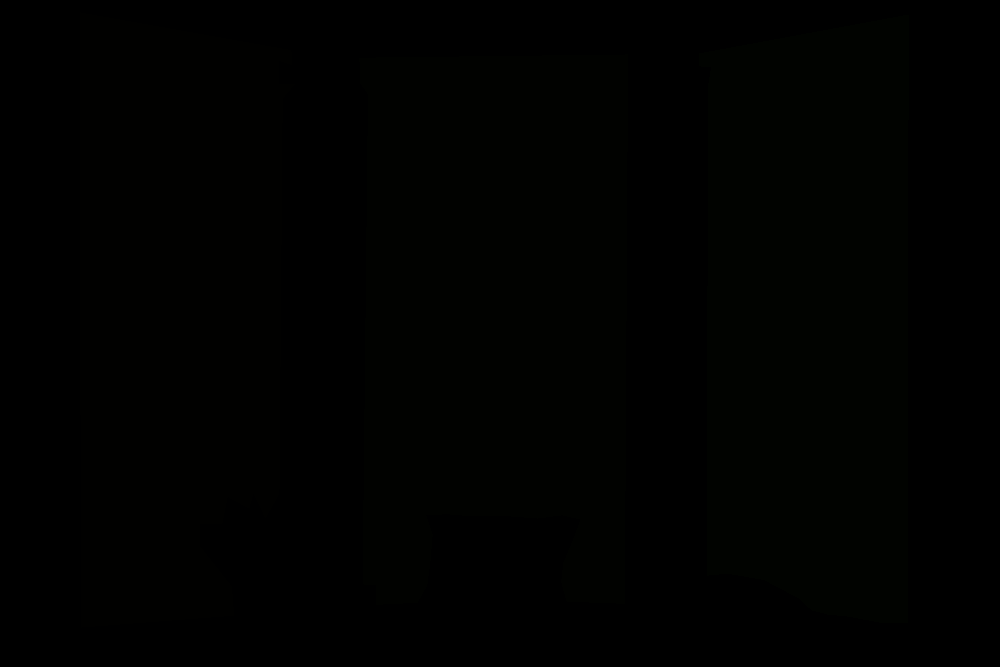

In [ ]:
dataset[index]['annotation']

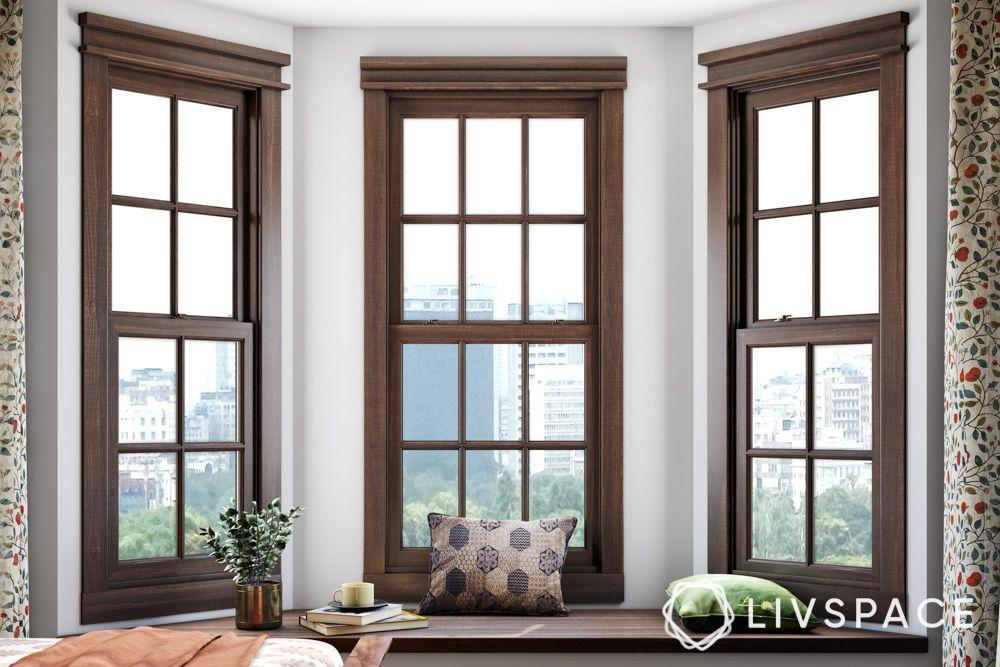

In [ ]:
dataset[index]['image']

In [ ]:
import numpy as np
index=3
seg = np.array(dataset[index]['annotation'])
# get green channel
instance_seg = seg[:, :, 1]
class_id_map = seg[:, :, 0]
print(np.unique(instance_seg))
print(np.unique(class_id_map))

[0 1 2 3 4 5]
[0 1 2]


In [ ]:
import numpy as np

annotation=np.array(dataset[index]['annotation'])
instance_seg = annotation[:,:,1] # green channel encodes instances
#print(instance_seg)
class_id_map = annotation[:,:,0] # red channel encodes semantic category
print(class_id_map)
class_labels = np.unique(class_id_map)
print(class_labels)

# create mapping between instance IDs and semantic category IDs
inst2class = {}
for label in class_labels:
    instance_ids = np.unique(instance_seg[class_id_map == label])
    inst2class.update({i: label for i in instance_ids})
print(inst2class)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 2]
{0: 0, 3: 1, 4: 1, 5: 2, 1: 2, 2: 2}


Visualizing instance: window


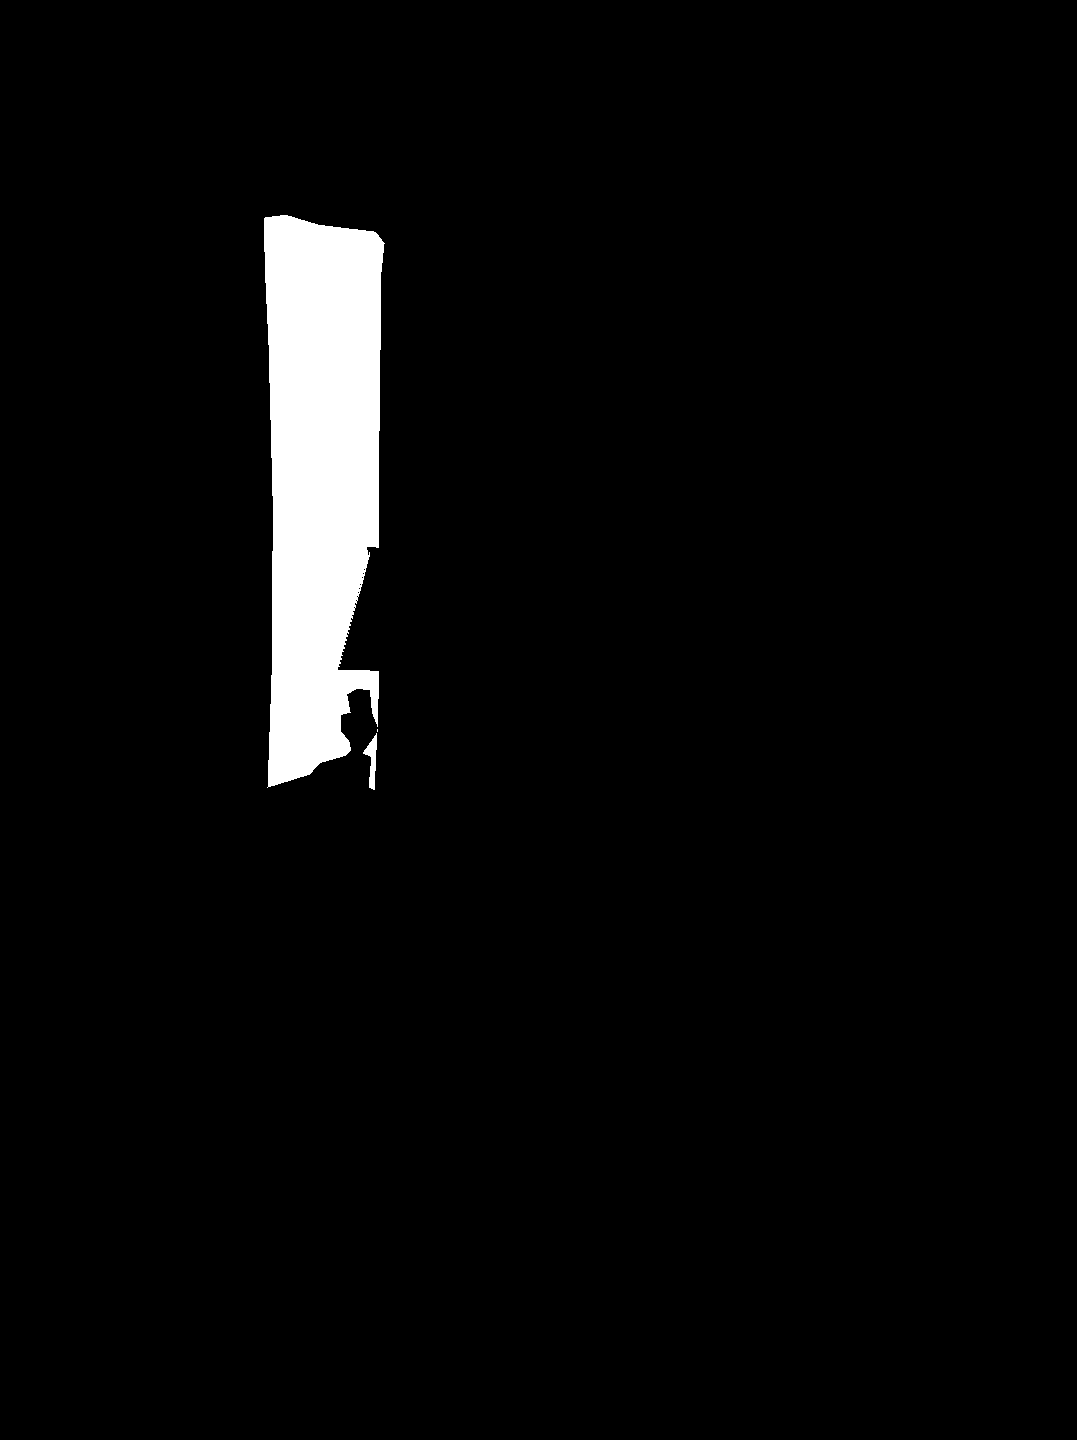

In [ ]:
from PIL import Image

print("Visualizing instance:", id2label[inst2class[0]])

# let's visualize the first instance (ignoring background)
mask = (instance_seg == 1)
visual_mask = (mask * 255).astype(np.uint8)
Image.fromarray(visual_mask)

Visualizing instance: curtain


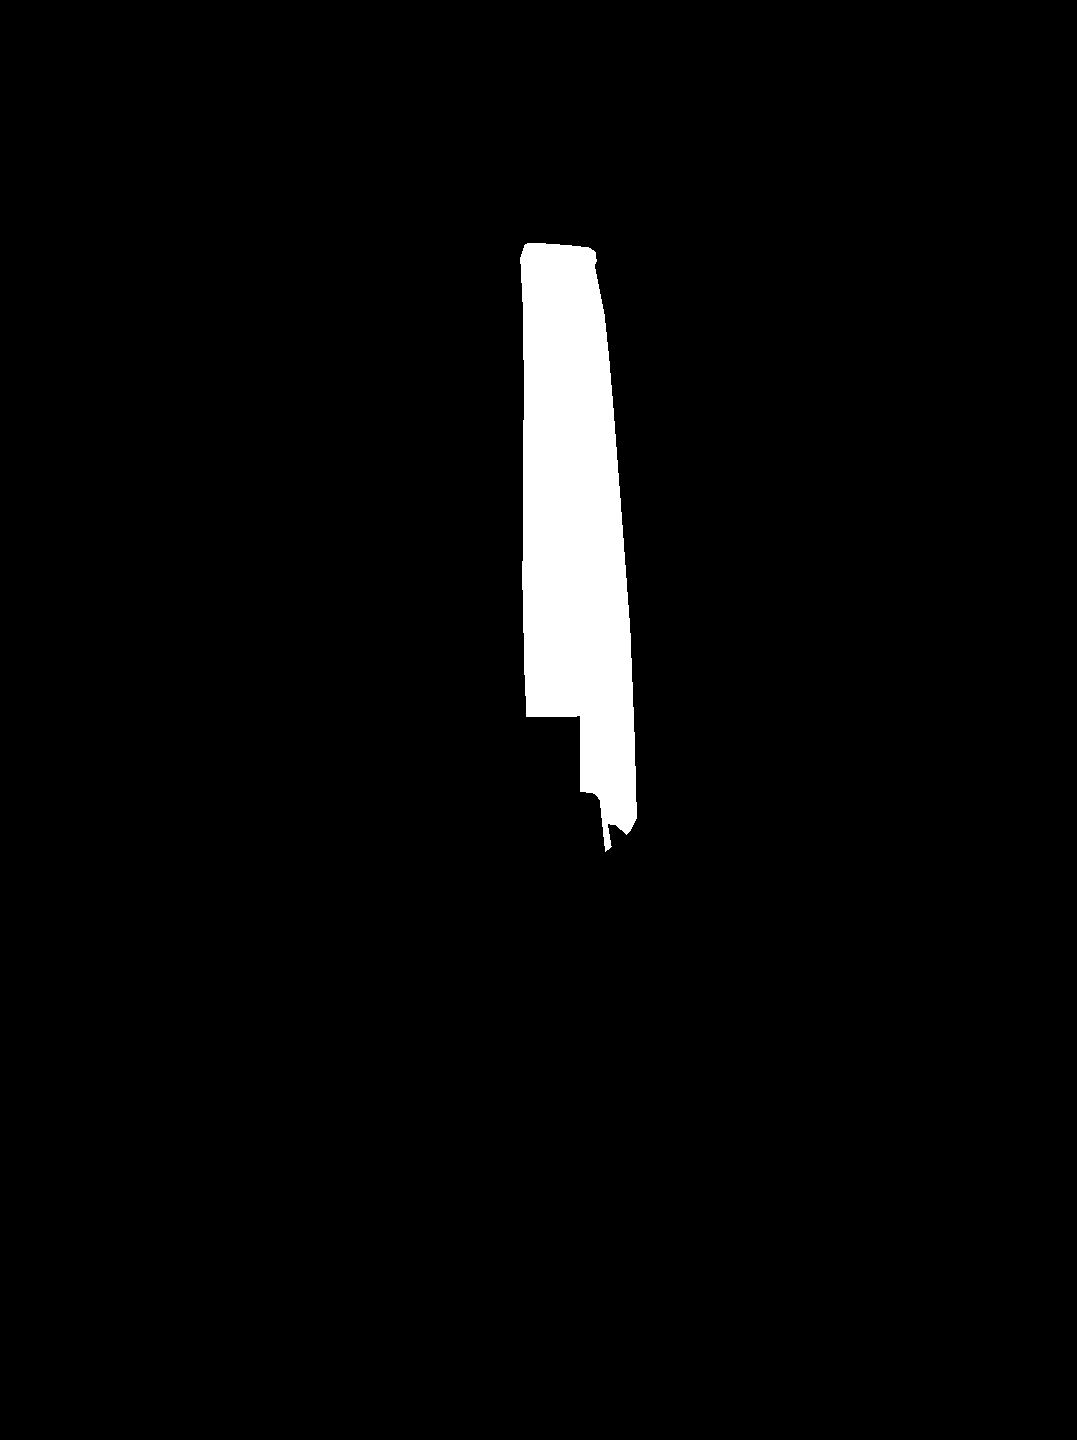

In [ ]:
print("Visualizing instance:", id2label[inst2class[4]])

# let's visualize the second instance
mask = (instance_seg == 2)
visual_mask = (mask * 255).astype(np.uint8)
Image.fromarray(visual_mask)

In [ ]:
R = seg[:, :, 0]
G = seg[:, :, 1]
masks = (R / 10).astype(np.int32) * 256 + (G.astype(np.int32))

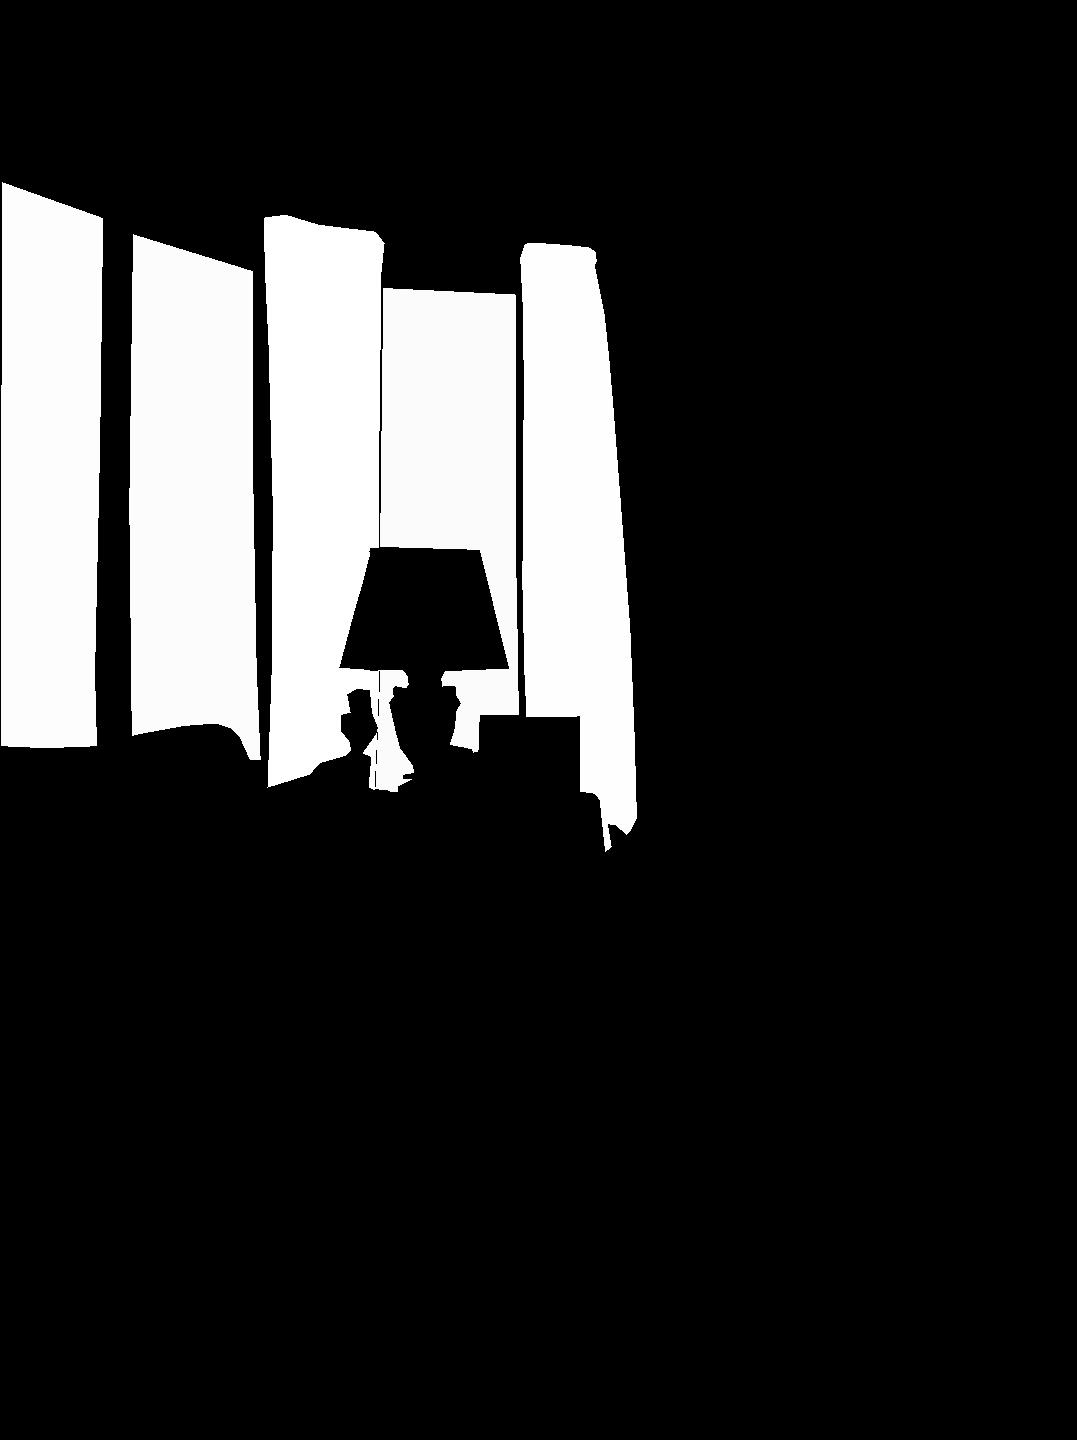

In [ ]:
visual_mask = (masks * 255).astype(np.uint8)
Image.fromarray(visual_mask)

In [ ]:
from transformers import MaskFormerImageProcessor

processor = MaskFormerImageProcessor(do_reduce_labels=True, ignore_index=255, do_resize=False, do_rescale=False, do_normalize=False)

In [ ]:
import albumentations as A

ADE_MEAN = np.array([123.675, 116.280, 103.530]) / 255
ADE_STD = np.array([58.395, 57.120, 57.375]) / 255

transform = A.Compose([
    A.Resize(width=512, height=512),
    A.Normalize(mean=ADE_MEAN, std=ADE_STD),
])

In [ ]:
transformed = transform(image=np.array(dataset[index]['image']), mask=instance_seg)
pixel_values = np.moveaxis(transformed["image"], -1, 0)
instance_seg_transformed = transformed["mask"]
print(pixel_values.shape)
print(instance_seg_transformed.shape)


(3, 512, 512)
(512, 512)


In [ ]:
np.unique(instance_seg_transformed)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [ ]:
inputs = processor([pixel_values], [instance_seg_transformed], instance_id_to_semantic_id=inst2class, return_tensors="pt")

In [ ]:
import torch

for k,v in inputs.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,[x.shape for x in v])

pixel_values torch.Size([1, 3, 512, 512])
pixel_mask torch.Size([1, 512, 512])
mask_labels [torch.Size([5, 512, 512])]
class_labels [torch.Size([5])]


In [ ]:
inputs["class_labels"]

[tensor([1, 1, 0, 0, 1])]

In [ ]:
inputs["class_labels"][0][0].item()

1

Label: curtain


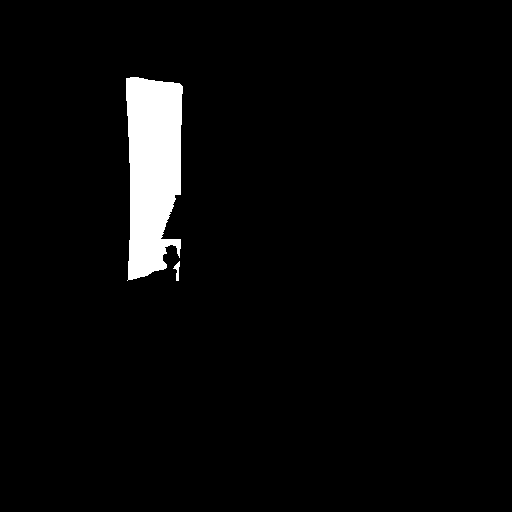

In [ ]:
from PIL import Image

# visualize first one
print("Label:", id2label[inputs["class_labels"][0][0].item()])

visual_mask = (inputs["mask_labels"][0][0].numpy() * 255).astype(np.uint8)
Image.fromarray(visual_mask)

Label: curtain


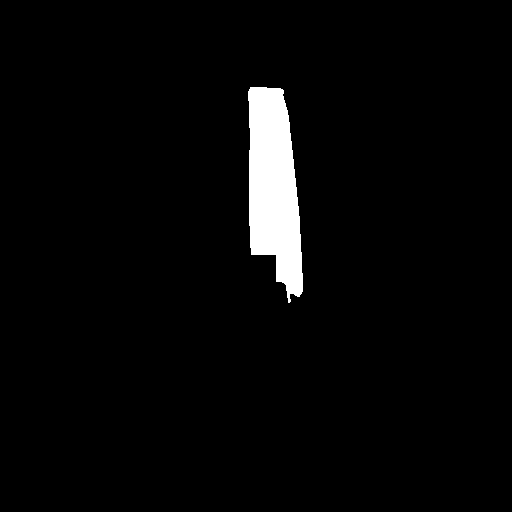

In [ ]:
# visualize second one
print("Label:", id2label[inputs["class_labels"][0][1].item()])

visual_mask = (inputs["mask_labels"][0][1].numpy() * 255).astype(np.uint8)
Image.fromarray(visual_mask)

In [ ]:
import numpy as np
from torch.utils.data import Dataset

class ImageSegmentationDataset(Dataset):
    """Image segmentation dataset."""

    def __init__(self,dataset,processor, transform=None):
        """
        Args:
            dataset
        """
        self.dataset = dataset
        self.processor = processor
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = np.array(self.dataset[idx]['image'].convert("RGB"))
        instance_seg = np.array(self.dataset[idx]['annotation'])[:,:,1]
        class_id_map = np.array(self.dataset[idx]['annotation'])[:,:,0]
        class_labels = np.unique(class_id_map)

        inst2class = {}
        for label in class_labels:
            instance_ids = np.unique(instance_seg[class_id_map == label])
            inst2class.update({i: label for i in instance_ids})

        # apply transforms
        if self.transform is not None:
            transformed = self.transform(image=image, mask=instance_seg)
            image, instance_seg = transformed['image'], transformed['mask']
            # convert to C, H, W
            image = image.transpose(2,0,1)

        if class_labels.shape[0] == 1 and class_labels[0] == 0:
            # Some image does not have annotation (all ignored)
            inputs = self.processor([image], return_tensors="pt")
            inputs = {k:v.squeeze() for k,v in inputs.items()}
            inputs["class_labels"] = torch.tensor([0])
            inputs["mask_labels"] = torch.zeros((0, inputs["pixel_values"].shape[-2], inputs["pixel_values"].shape[-1]))
        else:
          inputs = self.processor([image], [instance_seg], instance_id_to_semantic_id=inst2class, return_tensors="pt")
          inputs = {k: v.squeeze() if isinstance(v, torch.Tensor) else v[0] for k,v in inputs.items()}

        return inputs


In [ ]:
import albumentations as A

ADE_MEAN = np.array([123.675, 116.280, 103.530]) / 255
ADE_STD = np.array([58.395, 57.120, 57.375]) / 255

# note that you can include more fancy data augmentation methods here
train_transform = A.Compose([
    A.Resize(width=512, height=512),
    A.Normalize(mean=ADE_MEAN, std=ADE_STD),
])

train_dataset = ImageSegmentationDataset(dataset, processor=processor, transform=train_transform)

In [ ]:
inputs = train_dataset[4]
for k,v in inputs.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)

pixel_values torch.Size([3, 512, 512])
pixel_mask torch.Size([512, 512])
mask_labels torch.Size([10, 512, 512])
class_labels torch.Size([10])


In [ ]:
inputs["class_labels"]

tensor([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
inputs = train_dataset[6]
for k,v in inputs.items():
  print(k,v.shape)

pixel_values torch.Size([3, 512, 512])
pixel_mask torch.Size([512, 512])
mask_labels torch.Size([4, 512, 512])
class_labels torch.Size([4])


In [ ]:
inputs["class_labels"]

tensor([0, 0, 0, 0])

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    pixel_values = torch.stack([example["pixel_values"] for example in batch])
    pixel_mask = torch.stack([example["pixel_mask"] for example in batch])
    class_labels = [example["class_labels"] for example in batch]
    mask_labels = [example["mask_labels"] for example in batch]
    return {"pixel_values": pixel_values, "pixel_mask": pixel_mask, "class_labels": class_labels, "mask_labels": mask_labels}

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,len(v))

pixel_values torch.Size([1, 3, 512, 512])
pixel_mask torch.Size([1, 512, 512])
class_labels 1
mask_labels 1


In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,len(v))

pixel_values torch.Size([1, 3, 512, 512])
pixel_mask torch.Size([1, 512, 512])
class_labels 1
mask_labels 1


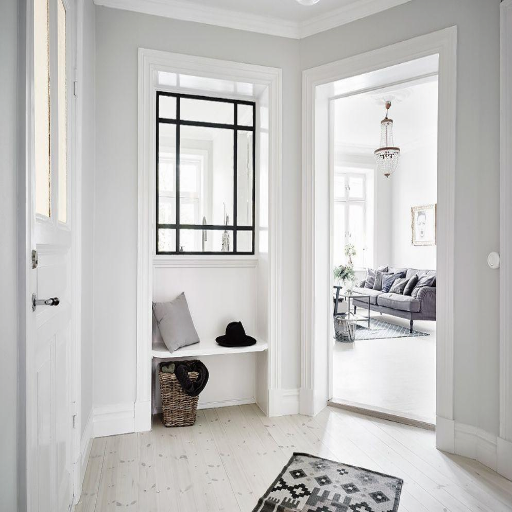

In [ ]:
from PIL import Image

ADE_MEAN = np.array([123.675, 116.280, 103.530]) / 255
ADE_STD = np.array([58.395, 57.120, 57.375]) / 255

batch_index = 0

unnormalized_image = (batch["pixel_values"][batch_index].numpy() * np.array(ADE_STD)[:, None, None]) + np.array(ADE_MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [ ]:
batch["class_labels"][batch_index]

tensor([0, 0])

In [ ]:
id2label[0]

'window'

In [ ]:
batch["mask_labels"][batch_index].shape

torch.Size([2, 512, 512])

Visualizing mask for: window


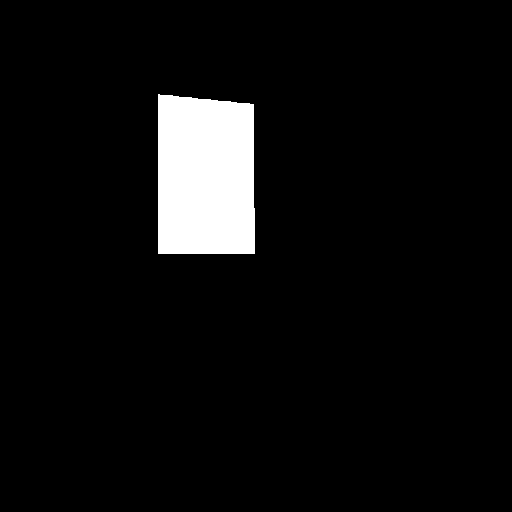

In [ ]:
print("Visualizing mask for:", id2label[batch["class_labels"][batch_index][0].item()])

visual_mask = (batch["mask_labels"][batch_index][0].bool().numpy() * 255).astype(np.uint8)
Image.fromarray(visual_mask)

Visualizing mask for: window


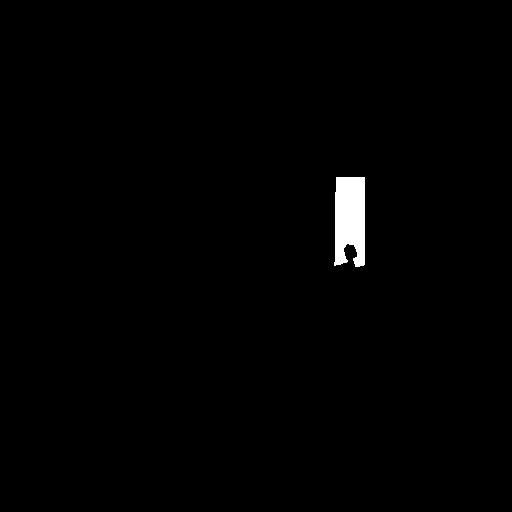

In [ ]:
print("Visualizing mask for:", id2label[batch["class_labels"][batch_index][1].item()])

visual_mask = (batch["mask_labels"][batch_index][1].bool().numpy() * 255).astype(np.uint8)
Image.fromarray(visual_mask)

In [ ]:
len(batch['mask_labels'])

1

In [ ]:
from transformers import MaskFormerForInstanceSegmentation

# Replace the head of the pre-trained model
# We specify ignore_mismatched_sizes=True to replace the already fine-tuned classification head by a new one
model = MaskFormerForInstanceSegmentation.from_pretrained("facebook/maskformer-swin-base-ade",
                                                          id2label=id2label,
                                                          ignore_mismatched_sizes=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of MaskFormerForInstanceSegmentation were not initialized from the model checkpoint at facebook/maskformer-swin-base-ade and are newly initialized because the shapes did not match:
- class_predictor.weight: found shape torch.Size([151, 256]) in the checkpoint and torch.Size([3, 256]) in the model instantiated
- class_predictor.bias: found shape torch.Size([151]) in the checkpoint and torch.Size([3]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([151]) in the checkpoint and torch.Size([3]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,len(v))

pixel_values torch.Size([1, 3, 512, 512])
pixel_mask torch.Size([1, 512, 512])
class_labels 1
mask_labels 1


In [ ]:
print([label.shape for label in batch["class_labels"]])
print(batch["class_labels"])

[torch.Size([4])]
[tensor([0, 0, 0, 0])]


In [ ]:
print([label.shape for label in batch["mask_labels"]])

[torch.Size([4, 512, 512])]


In [ ]:
outputs = model(
          pixel_values=batch["pixel_values"],
          mask_labels=batch["mask_labels"],
          class_labels=batch["class_labels"],
      )
outputs.loss

tensor([2.2616], grad_fn=<AddBackward0>)

In [ ]:
import torch
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

running_loss = 0.0
num_samples = 0
for epoch in range(100):
  print("Epoch:", epoch)
  model.train()
  for idx, batch in enumerate(tqdm(train_dataloader)):
      # Reset the parameter gradients
      optimizer.zero_grad()
      # Forward pass
      #print("===========Training============")
      outputs = model(
              pixel_values=batch["pixel_values"].to(device),
              mask_labels=[labels.to(device) for labels in batch["mask_labels"]],
              class_labels=[labels.to(device) for labels in batch["class_labels"]],
      )
      # Backward propagation
      loss = outputs.loss
      loss.backward()
      #print("==============================================")
      batch_size = batch["pixel_values"].size(0)
      running_loss += loss.item()
      num_samples += batch_size

      if idx % 100 == 0:
        print("Loss:", running_loss/num_samples)

      # Optimization
      optimizer.step()

Epoch: 0


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 2.1361656188964844
Epoch: 1


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.6234051287174225
Epoch: 2


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.574658690354763
Epoch: 3


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.607827799073581
Epoch: 4


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.5234520357924621
Epoch: 5


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.4586240040759246
Epoch: 6


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.4041435894758805
Epoch: 7


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.354340258374143
Epoch: 8


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.3091970257509769
Epoch: 9


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.2744379542594733
Epoch: 10


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.2466043258836756
Epoch: 11


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.2184771872702098
Epoch: 12


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.1992223236758637
Epoch: 13


  0%|          | 0/19 [00:00<?, ?it/s]

Loss: 1.1849534137835425


In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

1449

In [ ]:
idx = 1

image = dataset[idx]["image"]
image

NameError: name 'dataset' is not defined

In [ ]:
from transformers import MaskFormerImageProcessor

processor = MaskFormerImageProcessor()

In [ ]:
inputs = processor(image, return_tensors="pt").to(device)
for k,v in inputs.items():
  print(k,v.shape)

pixel_values torch.Size([1, 3, 800, 1088])
pixel_mask torch.Size([1, 800, 1088])


In [ ]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(**inputs)

In [ ]:
results = processor.post_process_instance_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
print(results.keys())

dict_keys(['segmentation', 'segments_info'])


In [ ]:
for segment in results['segments_info']:
  print(segment)

{'id': 0, 'label_id': 8, 'was_fused': False, 'score': 0.534017}
{'id': 1, 'label_id': 0, 'was_fused': False, 'score': 0.92681}


In [ ]:
import numpy as np

def get_mask(segmentation, segment_id):
  mask = (segmentation.cpu().numpy() == segment_id)
  visual_mask = (mask * 255).astype(np.uint8)
  visual_mask = Image.fromarray(visual_mask)

  return visual_mask

Visualizing mask for instance: window 


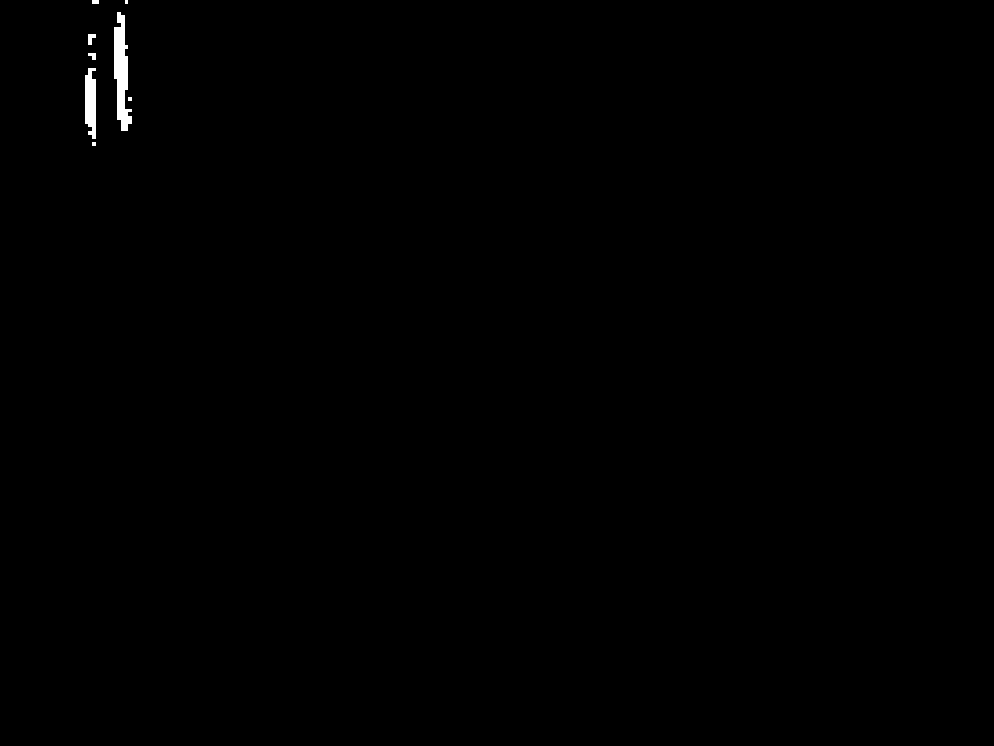

------
Visualizing mask for instance: wall


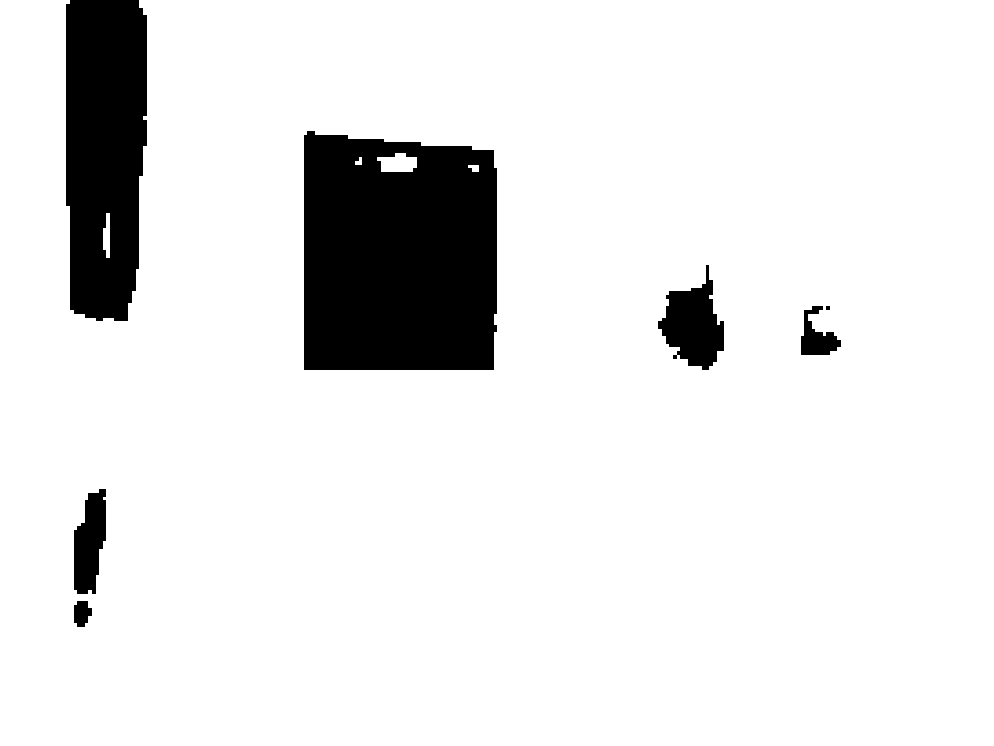

------


In [ ]:
for segment in results['segments_info']:
    print("Visualizing mask for instance:", model.config.id2label[segment['label_id']])
    mask = get_mask(results['segmentation'], segment['id'])
    display(mask)
    print("------")